In [1]:
from qiskit_aer import AerSimulator

In [2]:
#1. definindo o backend
backend_aer = AerSimulator()

In [3]:
AerSimulator().operations

[Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
 Instruction(name='ryy', num_qubits=2, num_clbits=0, params=[Parameter(ϴ)]),
 Instruction(name='cswap', num_qubits=3, num_clbits=0, params=[]),
 Instruction(name='x', num_qubits=1, num_clbits=0, params=[]),
 qiskit.circuit.library.generalized_gates.unitary.UnitaryGate,
 Instruction(name='h', num_qubits=1, num_clbits=0, params=[]),
 qiskit_aer.library.save_instructions.save_expectation_value.SaveExpectationValue,
 qiskit_aer.noise.noise_model.QuantumErrorLocation,
 qiskit_aer.backends.name_mapping.MCRGate,
 Instruction(name='sxdg', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='cz', num_qubits=2, num_clbits=0, params=[]),
 qiskit_aer.library.set_instructions.set_superop.SetSuperOp,
 Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]),
 qiskit_aer.noise.errors.readout_error.ReadoutError,
 Instruction(name='t', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='sx', num_qubits=1, num_clbits=0,

In [4]:
from qiskit import QuantumCircuit, transpile

In [5]:
# primitiva
from qiskit_ibm_runtime import SamplerV2

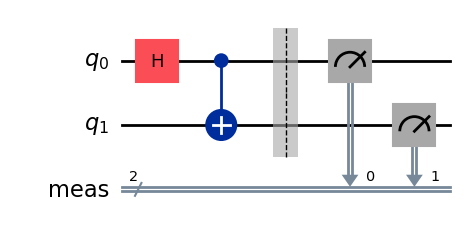

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
#qc.measure(0,0)
#qc.measure(1,1)
qc.measure_all()
qc.draw("mpl")

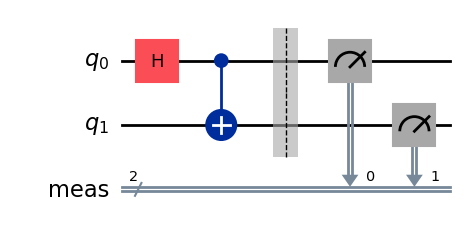

In [7]:
#2. transpilar o circuito
qct = transpile(qc,backend=backend_aer)
qct.draw("mpl")

Passos (SAMPLER)

definir o backend

transpilar o circuito

instaciar o SamplerV2

executar o circuito

In [9]:
#3. instaciando o sampler
sampler_aer = SamplerV2(backend=backend_aer)

In [10]:
import qiskit
qiskit.__version__

'1.2.0'

In [11]:
#4. executar o circuito
job_aer = sampler_aer.run([(qct,None,1000)])

In [12]:
result = job_aer.result()

In [30]:
counts = result[0].data.c.get_counts()

AttributeError: 'DataBin' object has no attribute 'c'

In [31]:
counts

NameError: name 'counts' is not defined

In [16]:
from qiskit.visualization import plot_distribution

In [17]:
plot_distribution([counts],legend=['AerSimulator'])

NameError: name 'counts' is not defined

In [18]:
from qiskit.circuit import Parameter

In [19]:
th = Parameter('theta')
ph = Parameter('phi')

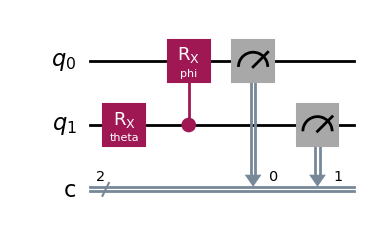

In [20]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(2, name='c')

qc2 = QuantumCircuit(qr,cr)

qc2.rx(th,1)
qc2.crx(ph,1,0)
qc2.measure(qr,cr)
qc2.draw("mpl")

In [21]:
import numpy as np
angles = [  [np.pi/2, np.pi/2], [np.pi/3, np.pi], [np.pi/2, np.pi] ]

In [22]:
qc2.parameters

ParameterView([Parameter(phi), Parameter(theta)])

In [23]:
qc2t = transpile(qc2,backend=backend_aer)

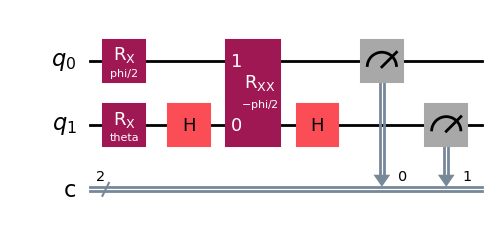

In [24]:
qc2t.draw("mpl")

In [25]:
job2 = sampler_aer.run([(qc2t,angles,1000)])
result2 = job2.result()
counts2 = result2[0].data.c.get_counts(2)

In [26]:
counts2

{'11': 499, '10': 501}

In [27]:
jobdupla = sampler_aer.run([ (qct,None,1000), (qc2t,angles,2000)])

In [28]:
resultdupla = jobdupla.result()

In [29]:
resultdupla[1].data.c.get_counts(1)

{'10': 1502, '11': 498}